In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
from numpy import *
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
plt.style.use(['science','notebook','grid'])
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [2]:
vals = load(r"C:\Users\Nunocastanheira\Desktop\boooks\research\Gelb!\Code\test\MasterC.npy")

In [3]:
energy = torch.tensor(vals[0,0,:,0],dtype=torch.float)
thickness = torch.tensor(range(1,151),dtype=torch.float)
counts = torch.tensor(vals[0,:,:,1],dtype=torch.float)
train = torch.tensor(vals[0,:,:,1],dtype=torch.float)*10**7
print(shape(energy))
print(shape(train))
print(shape(thickness))
print(energy)
print(train)

torch.Size([2048])
torch.Size([150, 2048])
torch.Size([150])
tensor([ 500.0000,  500.4880,  500.9770,  ..., 1498.5400, 1499.0200,
        1499.5100])
tensor([[2.9532, 2.9536, 2.9540,  ..., 0.0036, 0.0036, 0.0036],
        [2.9545, 2.9549, 2.9553,  ..., 0.0037, 0.0037, 0.0037],
        [2.9357, 2.9361, 2.9365,  ..., 0.0038, 0.0038, 0.0038],
        ...,
        [2.6783, 2.6785, 2.6788,  ..., 0.0050, 0.0049, 0.0049],
        [2.6670, 2.6672, 2.6675,  ..., 0.0050, 0.0049, 0.0049],
        [2.6736, 2.6738, 2.6741,  ..., 0.0050, 0.0049, 0.0049]])


In [4]:
def train_model(x,y,f, n_epochs=500):
    opt = SGD(f.parameters(), lr=10**-6.5)
    L = nn.MSELoss()

    # Train model
    losses = []
    for _ in tqdm(range(n_epochs)):
        opt.zero_grad() 
        loss_value = L(f(x), y)
        loss_value.backward() 
        opt.step() 
        losses.append(loss_value.item())
    return f, losses

N = 2**10
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2048,N)
        self.Matrix2 = nn.Linear(N,N)
        self.Matrix3 = nn.Linear(N,N)
        self.Matrix4 = nn.Linear(N,1)
        self.R = nn.ReLU()
        self.E = nn.Tanh()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.E(self.Matrix3(x))
        x = self.Matrix4(x)
        return x.squeeze()

x = train
y = thickness
f = MyNeuralNet()

# Train model
f, losses = train_model(x,y,f, n_epochs=100000)

100%|██████████| 100000/100000 [50:46<00:00, 32.82it/s] 


In [5]:
min(losses)

11.798026084899902

In [6]:
shape(f(x))

torch.Size([150])

In [7]:
f(x)

tensor([  1.1271,   2.0080,   2.9649,   3.9831,   5.0522,   5.9215,   6.9188,
          7.9910,   8.9571,   9.9206,  11.0274,  11.9473,  13.2298,  14.1255,
         15.0728,  15.9839,  16.8701,  18.0975,  18.9024,  20.0885,  20.8182,
         21.7767,  23.3469,  23.8517,  24.9082,  26.0812,  27.0521,  27.8653,
         29.0933,  30.0979,  31.1006,  32.6012,  32.6411,  34.2521,  34.9590,
         36.0481,  37.5738,  37.6738,  38.6733,  39.4366,  40.6171,  41.5784,
         44.0892,  44.1634,  45.0248,  45.6369,  46.8890,  47.0286,  49.0142,
         50.9086,  51.6049,  51.3462,  52.8604,  55.3537,  54.8205,  56.5652,
         57.1581,  58.1455,  56.7622,  60.3990,  61.4478,  61.7719,  63.6664,
         65.2485,  66.1581,  65.9458,  69.0299,  68.8163,  69.2421,  69.1436,
         70.9925,  74.8405,  72.3567,  74.9868,  73.5732,  75.5990,  76.6571,
         74.8312,  76.8309,  80.0552,  84.6354,  87.5697,  80.7996,  86.6175,
         86.7161,  91.1808,  81.6269,  86.1887,  91.9945,  93.47

In [8]:
thickness

tensor([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
         25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
         37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
         49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
         61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
         73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,
         85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,
         97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107., 108.,
        109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
        133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143., 144.,
        145., 146., 147., 148., 149., 15

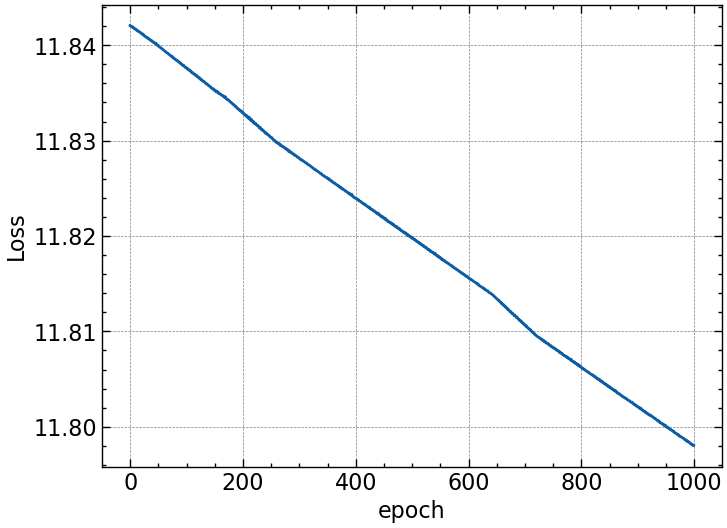

In [39]:
plt.plot(losses[99000:])
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()

In [10]:
torch.save(f, 'Al thickness attempt.pt')

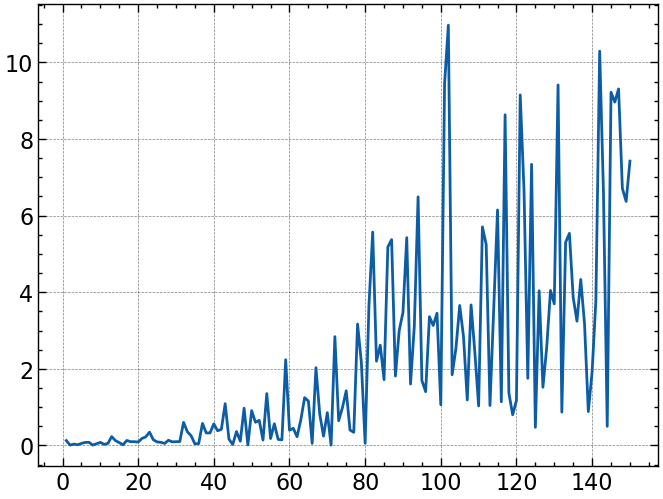

In [11]:
plt.plot(thickness.detach().numpy(), abs(thickness-f(x)).detach().numpy())

In [12]:
vals2 = load(r"C:\Users\Nunocastanheira\Desktop\boooks\research\Gelb!\Code\test\master 05.npy")

In [13]:
test = torch.tensor(vals2[0,:,:,1],dtype=torch.float)*10**7


In [14]:
shape(test)

torch.Size([21, 2048])

In [25]:
ar = ones((129, 2048))
ar = append(ar, test, axis = 0)
print(shape(ar))

test2 = torch.tensor(ar,dtype=torch.float)

(150, 2048)


In [26]:
f(test2)

tensor([-13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226,
        -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226,
        -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226,
        -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226,
        -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226,
        -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226,
        -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226,
        -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226,
        -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226,
        -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226,
        -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226,
        -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.1226,
        -13.1226, -13.1226, -13.1226, -13.1226, -13.1226, -13.12

In [29]:
comp = array(range(11,32))+0.5

In [35]:
f(test2)[-21:]

tensor([11.7143, 12.7711, 13.7118, 14.7347, 15.6216, 16.7101, 17.3843, 18.3976,
        19.4872, 20.4093, 21.2925, 22.2292, 23.8303, 24.1822, 25.3521, 26.9179,
        27.6511, 28.4548, 29.4915, 29.8022, 31.7406], grad_fn=<SliceBackward0>)

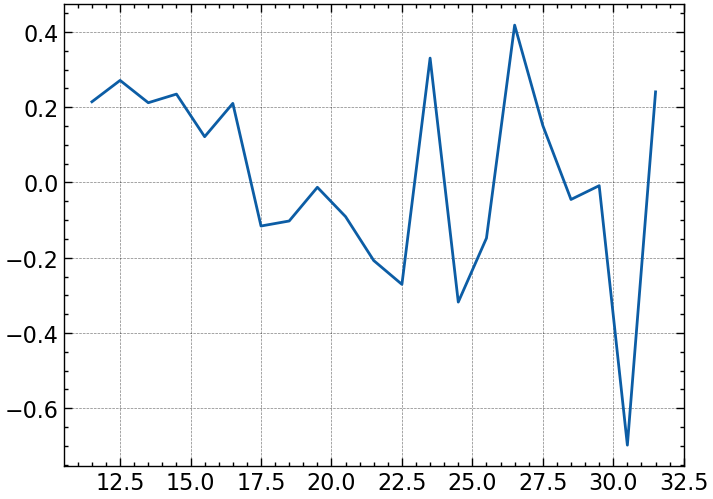

In [34]:
plt.plot(comp, (f(test2).detach().numpy())[-21:]-comp)